In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Dhruvin3103/ML/main/CSV/stackoverflow_full.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [ ]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [ ]:
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [ ]:
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [ ]:
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others'

df['Continent'] = df['Country'].apply(segment_country)

In [ ]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

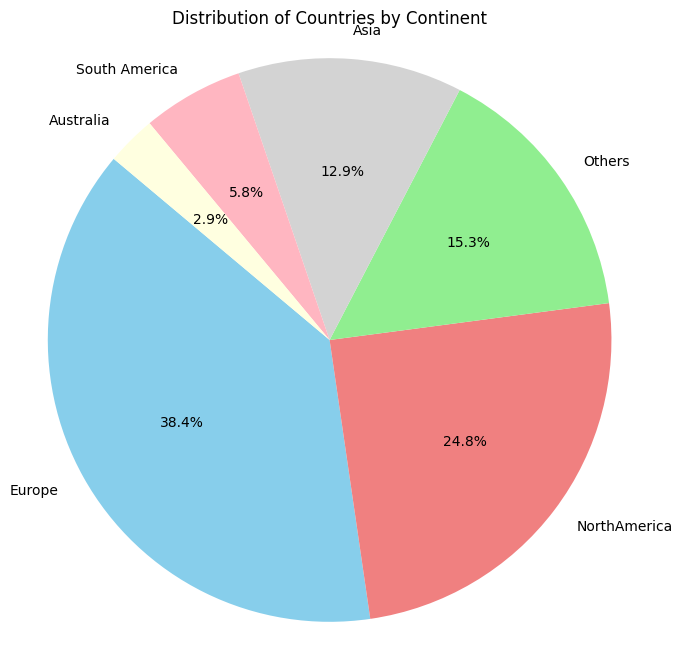

In [ ]:
continent_counts = df['Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')
plt.show()

In [ ]:
df.drop(columns = 'Country', inplace=True)
df.drop(columns = 'YearsCodePro', inplace=True)

In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica
4,>35,No,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia


In [ ]:
df_filtered = df[df['Gender'] != 'NonBinary']

In [ ]:
df_copy = df_filtered.copy()
label_encoder = LabelEncoder()
categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df_filtered[col])

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

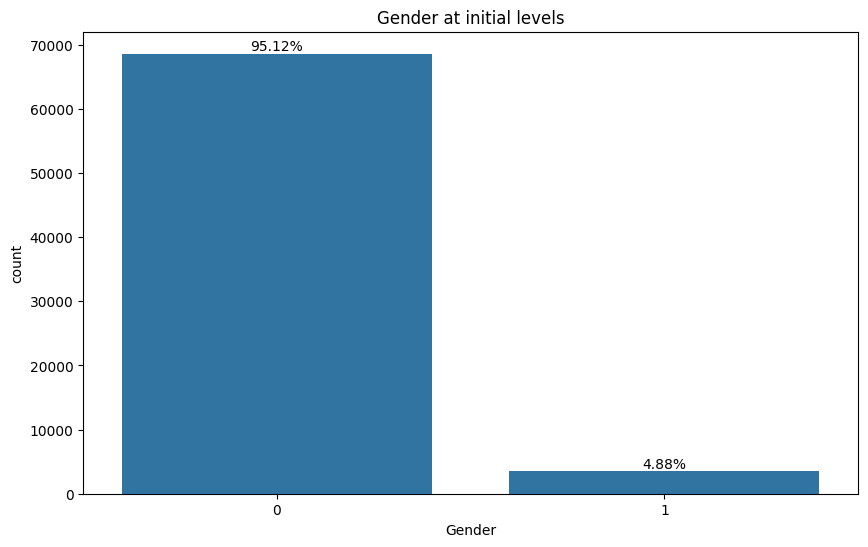

In [ ]:
plt.figure(figsize=(10,6))
plot=plt.subplot(111)
sns.countplot(x=df_copy['Gender'])
plt.title('Gender at initial levels')
annot_percent(plot)
plt.show()

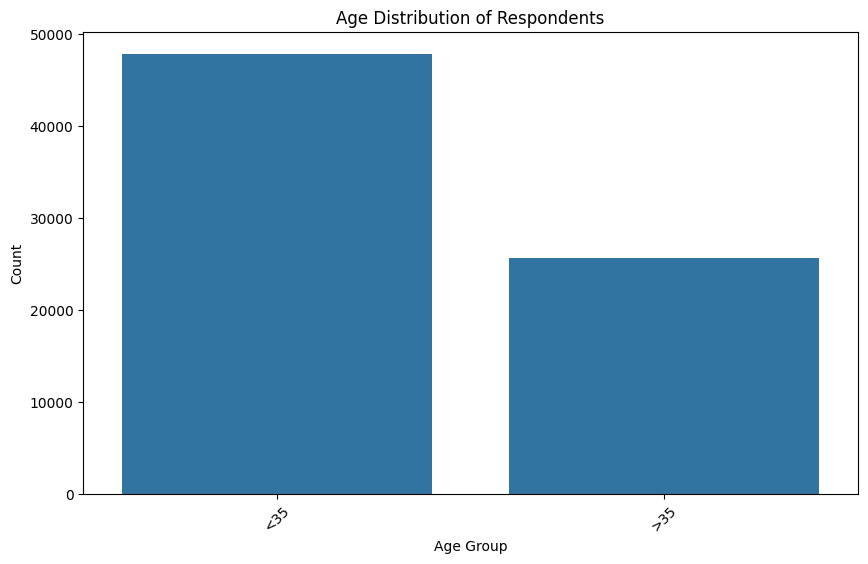

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', order=['<35', '>35'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

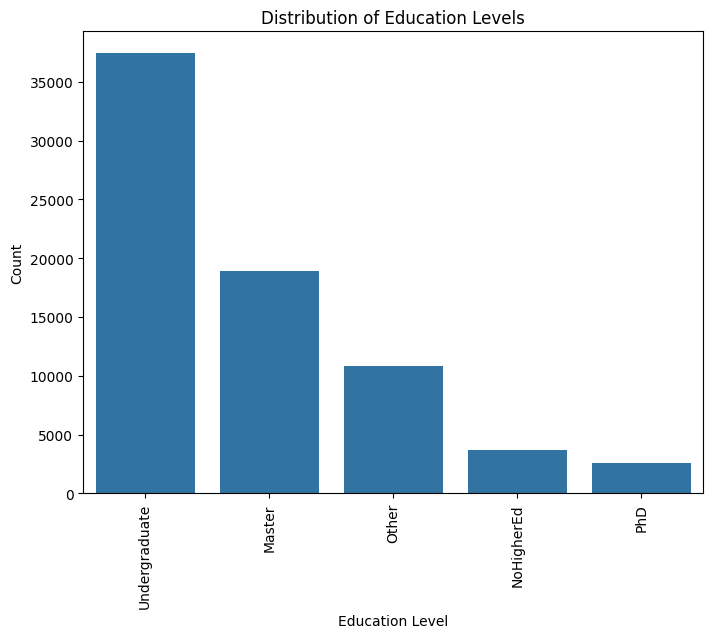

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EdLevel', order=df['EdLevel'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

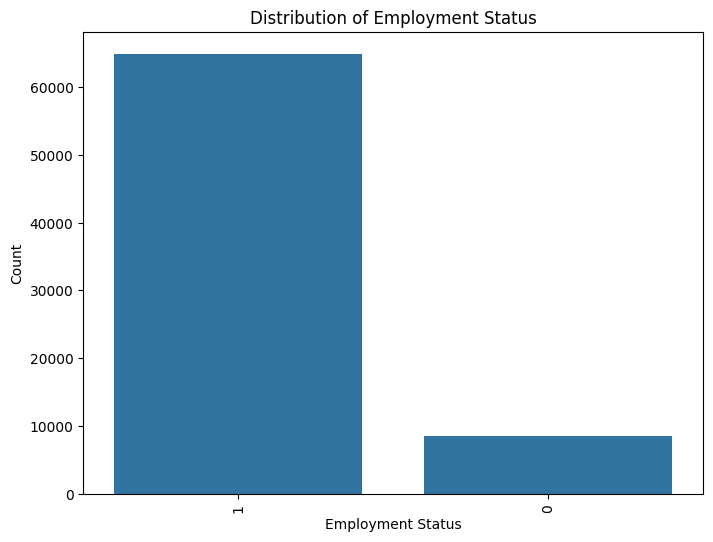

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()

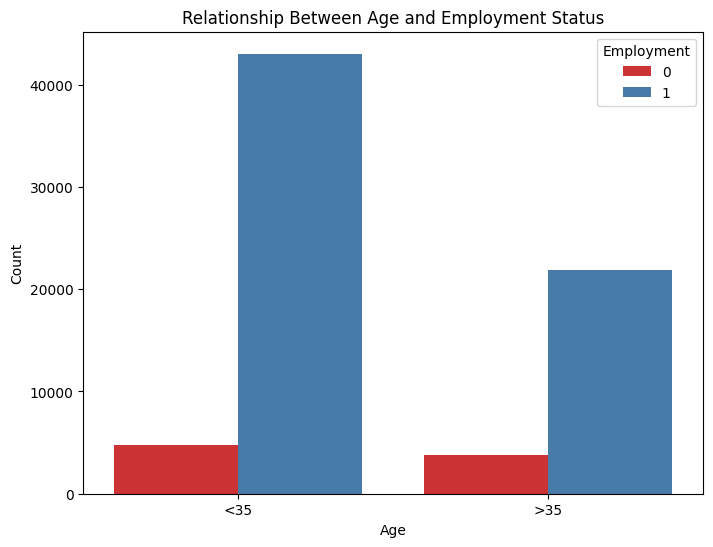

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Employment', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship Between Age and Employment Status')
plt.show()

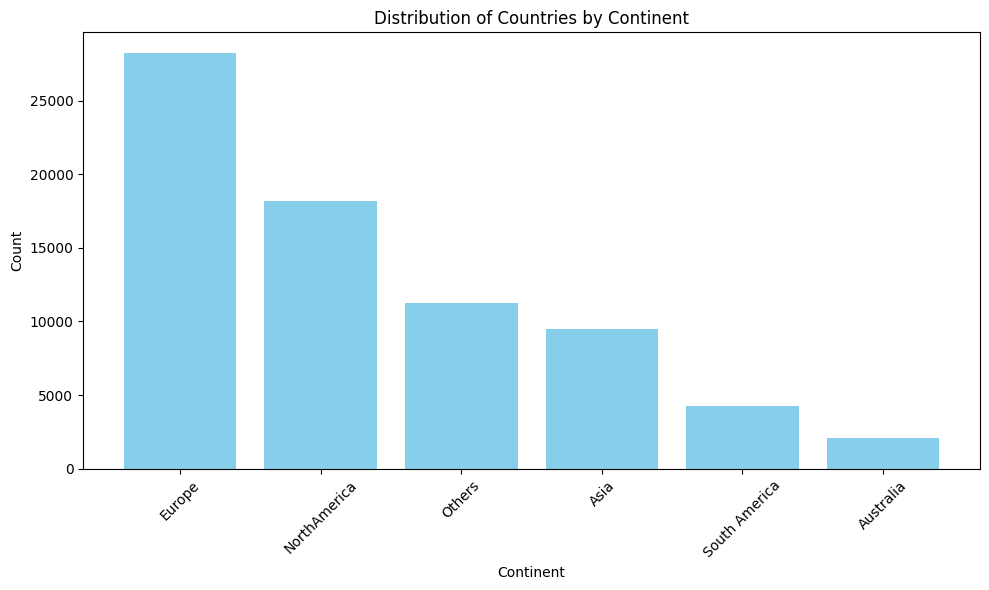

In [ ]:
continent_counts = df['Continent'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values, color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Countries by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

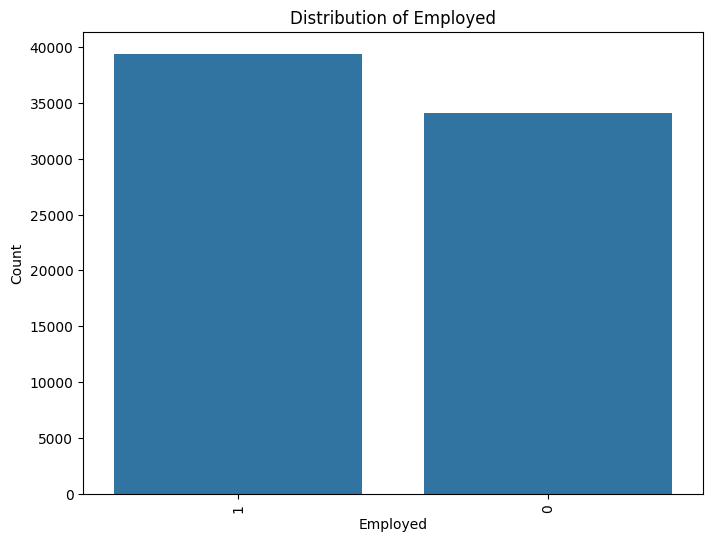

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employed', order=df['Employed'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.show()

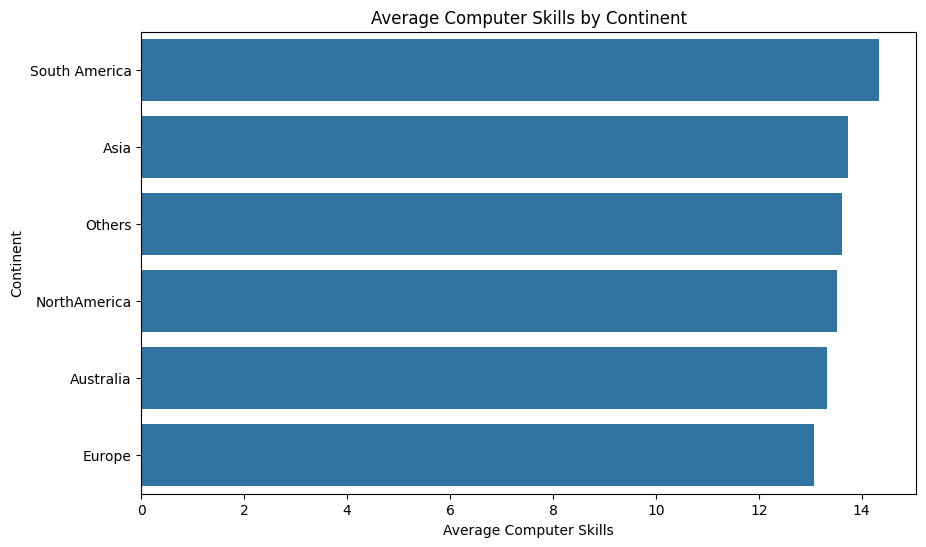

In [ ]:
continent_computer_skills = df.groupby('Continent')['ComputerSkills'].mean().reset_index()

continent_computer_skills = continent_computer_skills.sort_values(by='ComputerSkills', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_computer_skills, x='ComputerSkills', y='Continent')
plt.xlabel('Average Computer Skills')
plt.ylabel('Continent')
plt.title('Average Computer Skills by Continent')
plt.show()

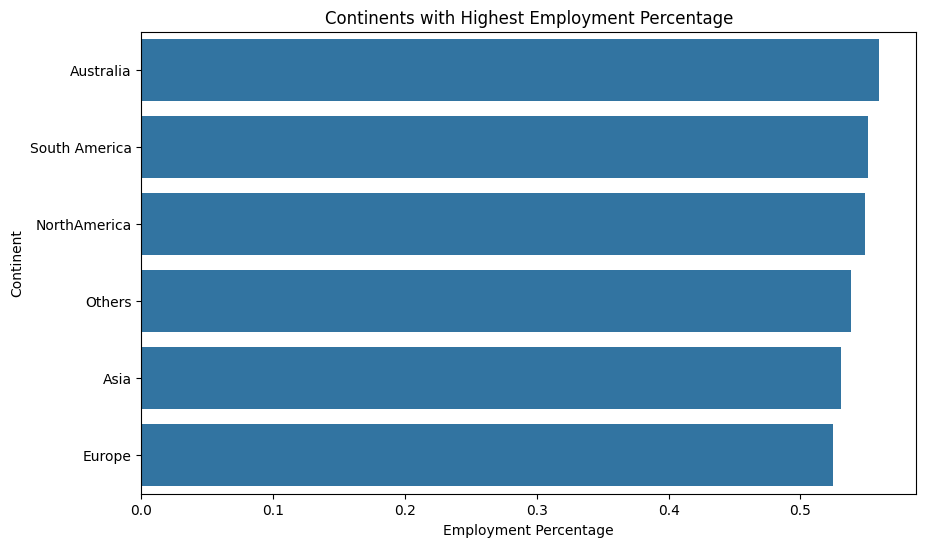

In [ ]:
continent_employment = df.groupby('Continent')['Employed'].mean().reset_index()

continent_employment = continent_employment.sort_values(by='Employed', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_employment, x='Employed', y='Continent')
plt.xlabel('Employment Percentage')
plt.ylabel('Continent')
plt.title('Continents with Highest Employment Percentage')
plt.show()

In [ ]:
df_copy['Employed'].value_counts()

Employed
1    38661
0    33430
Name: count, dtype: int64

In [ ]:
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

# Remove outliers in 'YearsCode', 'PreviousSalary,' and 'ComputerSkills'
df_copy = remove_outliers_iqr(df_copy, 'YearsCode')
df_copy = remove_outliers_iqr(df_copy, 'PreviousSalary')
df_copy = remove_outliers_iqr(df_copy, 'ComputerSkills')

In [ ]:
df_copy.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,0,0,0,1,0,0,0,7,51552.0,4,0,2
1,0,0,4,1,0,0,0,12,46482.0,12,1,2
2,0,0,0,1,0,0,0,15,77290.0,7,0,2
3,0,0,4,1,0,0,0,9,46135.0,13,0,3
5,0,0,0,1,0,0,0,9,38915.0,5,0,2


In [ ]:
X = df_copy.drop(["Employed","MentalHealth","Accessibility","PreviousSalary","MainBranch"],axis=1)
y = df_copy["Employed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)
print(f'Logistic Regression - AUC: {auc_lr:.4f}')

Logistic Regression - AUC: 0.8637


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

y_scores_dt = decision_tree.predict_proba(X_train)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)
auc_dt = auc(fpr_dt, tpr_dt)
print(f'Decision Tree - AUC: {auc_dt:.4f}')

Decision Tree - AUC: 0.9474


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

y_scores_rf = random_forest.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(f'Random Forest - AUC: {auc_rf:.4f}')


Random Forest - AUC: 0.9428


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate AUC
y_scores_knn = knn.predict_proba(X_train)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn)
auc_knn = auc(fpr_knn, tpr_knn)
print(f'K-Nearest Neighbors (KNN) - AUC: {auc_knn:.4f}')


K-Nearest Neighbors (KNN) - AUC: 0.8876


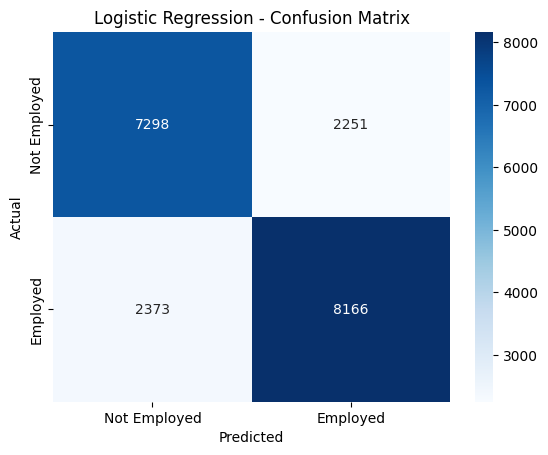

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

In [ ]:
sample_data1 = [
    1,  # Age
    3,  # EdLevel
    1,  # Employmenta
    0,  # Gender
    10, # YearsCode
    10, # ComputerSkills
    2  # Continent
]

sample_data_reshaped = [sample_data1]
prediction = logistic_regression.predict(sample_data_reshaped)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
sample_data2 = [
    1,  # Age
    3,  # EdLevel
    1,  # Employmenta
    1,  # Gender
    10, # YearsCode
    10, # ComputerSkills
    1  # Continent
]

sample_data_reshape = [sample_data2]
predictionn = logistic_regression.predict(sample_data_reshape)
print(predictionn)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
# from tensorflow.keras.utils import to_categorical

In [ ]:
# y_encoded = to_categorical(y)

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(y_encoded.shape[1], activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# X = np.expand_dims(X, axis=-1)

# Define the model
# model = Sequential()
# model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(y_encoded.shape[1], activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.fit(X, y_encoded, epochs=20, batch_size=16, validation_split=0.3)

In [ ]:
# loss, accuracy = model.evaluate(X, y_encoded)
# print(f'Loss: {loss}, Accuracy: {accuracy}')

**IMD Learn**

In [ ]:
!pip install imblearn

In [ ]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)


smote1 = df_copy.drop(columns=['Gender'])
smote2 = df_copy["Gender"]
# smote1 = df_copy.drop(columns=["Gender"])
# smote2 = df_copy.drop(columns=['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent'])
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(smote1, smote2)

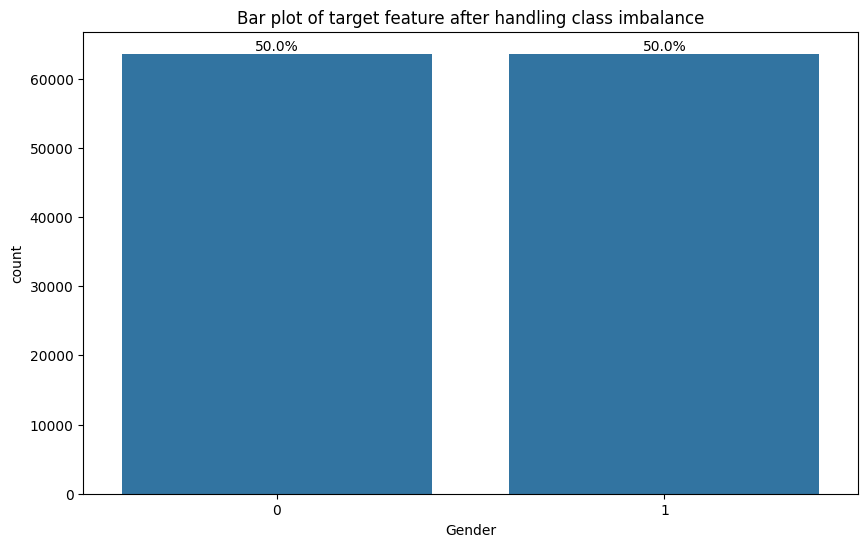

In [ ]:
plt.figure(figsize=(10, 6))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

In [ ]:
import pandas as pd

y_smote_df = pd.DataFrame(y_smote, columns=['Gender'])
df_smote_combined = pd.concat([x_smote, y_smote_df], axis=1)
df_smote_combined.head(20)


,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent,Gender
0,0,0,0,1,0,0,7,51552.0,4,0,2,0
1,0,0,4,1,0,0,12,46482.0,12,1,2,0
2,0,0,0,1,0,0,15,77290.0,7,0,2,0
3,0,0,4,1,0,0,9,46135.0,13,0,3,0
4,0,0,0,1,0,0,9,38915.0,5,0,2,0
5,1,0,0,1,0,0,26,77831.0,17,1,2,0
6,0,0,0,1,0,1,14,81319.0,4,0,2,0
7,1,0,4,1,0,0,39,68507.0,3,0,2,0
8,1,0,0,1,0,0,20,37752.0,6,0,4,0
9,0,0,4,1,1,0,4,122580.0,18,1,4,0


In [ ]:
X1 = df_smote_combined.drop(["Employed","MentalHealth","Accessibility","PreviousSalary","MainBranch"],axis=1)
y1 = df_smote_combined["Employed"]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)
print(f'Logistic Regression - AUC: {auc_lr:.4f}')

Logistic Regression - AUC: 0.8706


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

y_scores_dt = decision_tree.predict_proba(X_train)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)
auc_dt = auc(fpr_dt, tpr_dt)
print(f'Decision Tree - AUC: {auc_dt:.4f}')

Decision Tree - AUC: 0.9526


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

y_scores_rf = random_forest.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(f'Random Forest - AUC: {auc_rf:.4f}')


Random Forest - AUC: 0.9490


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate AUC
y_scores_knn = knn.predict_proba(X_train)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn)
auc_knn = auc(fpr_knn, tpr_knn)
print(f'K-Nearest Neighbors (KNN) - AUC: {auc_knn:.4f}')


K-Nearest Neighbors (KNN) - AUC: 0.9022


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
y_encoded = to_categorical(y1)

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(y_encoded.shape[1], activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X = np.expand_dims(X1, axis=-1)

# Define the model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             192       
                                                                 
 batch_normalization (Batch  (None, 6, 64)             256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.fit(X, y_encoded, epochs=20, batch_size=16, validation_split=0.3)

Epoch 1/20
5565/5565 [==============================] - 24s 4ms/step - loss: 0.5093 - accuracy: 0.7484 - val_loss: 0.4318 - val_accuracy: 0.8044
Epoch 2/20
5565/5565 [==============================] - 23s 4ms/step - loss: 0.4794 - accuracy: 0.7671 - val_loss: 0.4034 - val_accuracy: 0.8088
Epoch 3/20
5565/5565 [==============================] - 24s 4ms/step - loss: 0.4762 - accuracy: 0.7684 - val_loss: 0.3947 - val_accuracy: 0.8116
Epoch 4/20
5565/5565 [==============================] - 21s 4ms/step - loss: 0.4730 - accuracy: 0.7696 - val_loss: 0.3976 - val_accuracy: 0.8132
Epoch 5/20
5565/5565 [==============================] - 22s 4ms/step - loss: 0.4711 - accuracy: 0.7711 - val_loss: 0.4014 - val_accuracy: 0.8051
Epoch 6/20
5565/5565 [==============================] - 22s 4ms/step - loss: 0.4709 - accuracy: 0.7715 - val_loss: 0.3981 - val_accuracy: 0.8043
Epoch 7/20
5565/5565 [==============================] - 20s 4ms/step - loss: 0.4704 - accuracy: 0.7709 - val_loss: 0.4009 - val_ac

In [ ]:
loss, accuracy = model.evaluate(X, y_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3975/3975 [==============================] - 9s 2ms/step - loss: 0.4376 - accuracy: 0.7862
Loss: 0.4376193881034851, Accuracy: 0.7862005829811096
